<a href="https://colab.research.google.com/github/chaiminwoo0223/Machine-Learning/blob/main/17_Dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 패션 MNIST 데이터셋을 훈련 세트와 테스트 세트로 반환하기
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
# 훈련 세트와 검증 세트로 분할(8:2)
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)
# 신경망 모델 생성하기
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/5
1500/1500 [==============================] - 9s 3ms/step - loss: 0.5296 - accuracy: 0.8133
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3930 - accuracy: 0.8591
Epoch 3/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3555 - accuracy: 0.8730
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3361 - accuracy: 0.8805
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3194 - accuracy: 0.8858


In [2]:
# 신경망 모델 생성하기
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [3]:
model = model_fn()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=0) # 에포크 = 5

In [5]:
type(history)

keras.callbacks.History

In [6]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


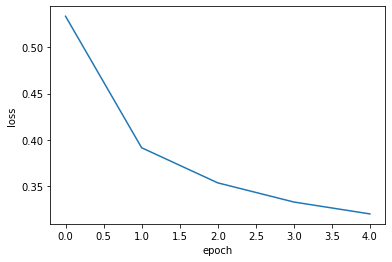

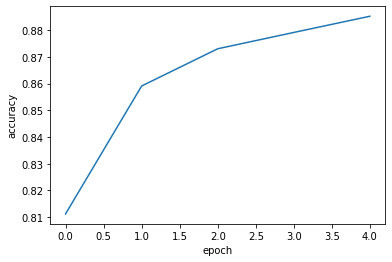

In [7]:
import matplotlib.pyplot as plt
# 손실함수(loss) 시각화하기
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
# 정확도(accuracy) 시각화하기
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

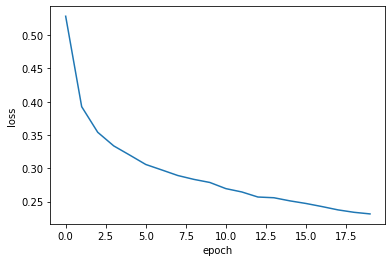

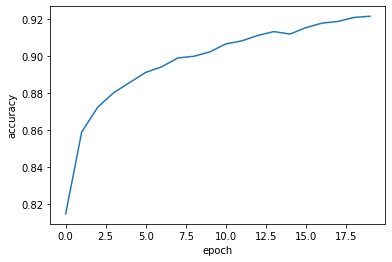

In [8]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0) # 에포크 = 20
# 손실함수(loss) 시각화하기
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
# 정확도(accuracy) 시각화하기
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [9]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

In [10]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


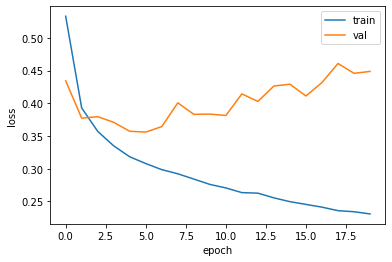

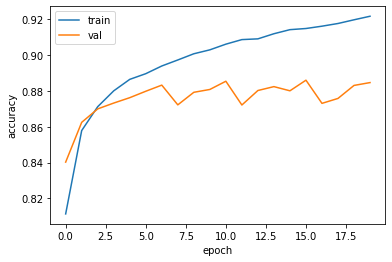

In [11]:
# 에포크마다 검증 손실 계산하기
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()
# 에포크마다 검증 정확도 계산하기
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'val'])
plt.show()

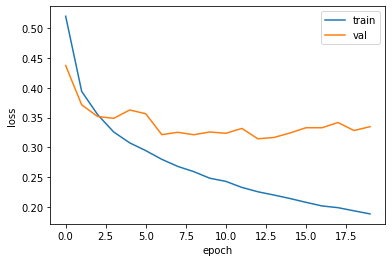

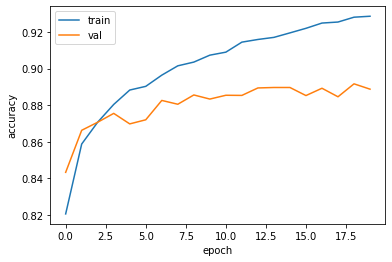

In [12]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy') # 옵티마이저 설정 변경하기 : optimizer='adam'
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
# 에포크마다 검증 손실 계산하기
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()
# 에포크마다 검증 정확도 계산하기
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'val'])
plt.show()

In [13]:
# Dropout() : 특정 은닉층 뒤에 드롭아웃을 두어, 일부 노드의 출력을 0으로 만드는 클래스
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


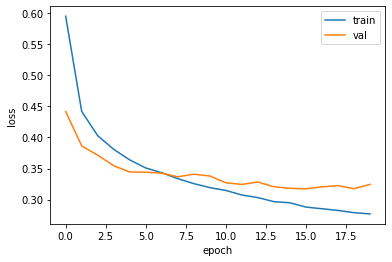

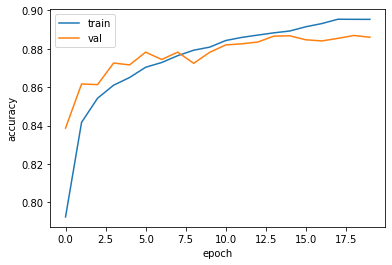

In [14]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
# 에포크마다 검증 손실 계산하기
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()
# 에포크마다 검증 정확도 계산하기
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'val'])
plt.show()

In [15]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=10, verbose=0, validation_data=(val_scaled, val_target))

In [16]:
# save_weights() : 훈련된 모델 파라미터를 저장
model.save_weights('model-weights.h5')

In [17]:
# save() : 모델 구조와 모델 파라미터를 함께 저장
model.save('model-whole.h5')

In [18]:
!ls -al *.h5

-rw-r--r-- 1 root root 333448 Nov 14 11:20 model-weights.h5
-rw-r--r-- 1 root root 982664 Nov 14 11:20 model-whole.h5


In [19]:
# load_weights() : 훈련된 모델 파라미터를 적재
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

In [20]:
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

375/375 [==============================] - 1s 1ms/step
0.8765


In [21]:
# load_model() : model.save()로 저장된 모델 전체를 복원(모델 구조, 모델 파라미터, 옵티마이저)
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3394 - accuracy: 0.8765


[0.3394254744052887, 0.8765000104904175]

In [22]:
# 콜백(callback) : 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True) # save_best_only : 최상의 모델만 저장(True)
model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])

In [23]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3149 - accuracy: 0.8870


[0.31491732597351074, 0.8870000243186951]

In [24]:
# 조기 종료(early stopping) : 과대적합이 시작되기 전에 훈련을 중지하는 것
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True) # restore_best_weights : 조기 종료 시 최상의 모델을 복원(True)
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

In [25]:
# stopped_epoch : 훈련이 중지된 에포크 횟수를 저장
print(early_stopping_cb.stopped_epoch)

7


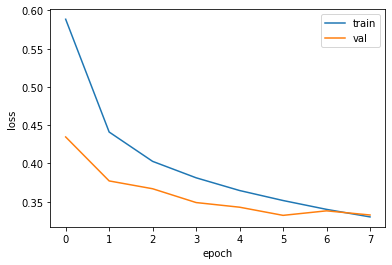

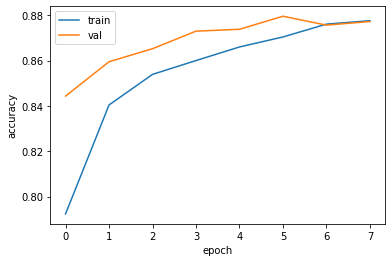

In [26]:
# 에포크마다 검증 손실 계산하기
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()
# 에포크마다 검증 정확도 계산하기
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'val'])
plt.show()

In [27]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3323 - accuracy: 0.8796


[0.3322904706001282, 0.8795833587646484]